<a href="https://colab.research.google.com/github/kevinbui0410/ML4MK/blob/main/Bai_6_Monthly_Champagne_Sales_Millions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Business Understanding**

Cho dữ liệu champagne_new.xlsx là dữ liệu bán champagne theo thời gian từ tháng 01-1964 đến tháng 09-1972

Dự đoán số tiền champagne bán được của 9 tháng tiếp theo từ tháng 10-1972 đến tháng 06-1973

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2:Data Understanding/Acquire**

Data đã được cung cấp trong file champagne_new.xlsx




**Step 3: Data prepartion/Prepare**

In [ ]:
path = '/content/drive/My Drive/LDS6_Bui_Thanh_Quang/LDS6_Bui_Thanh_Quang_Thi/'

In [ ]:
data = pd.read_excel(path+'data/champagne_new.xlsx',index_col=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   monthly_champange  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [ ]:
data.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [ ]:
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

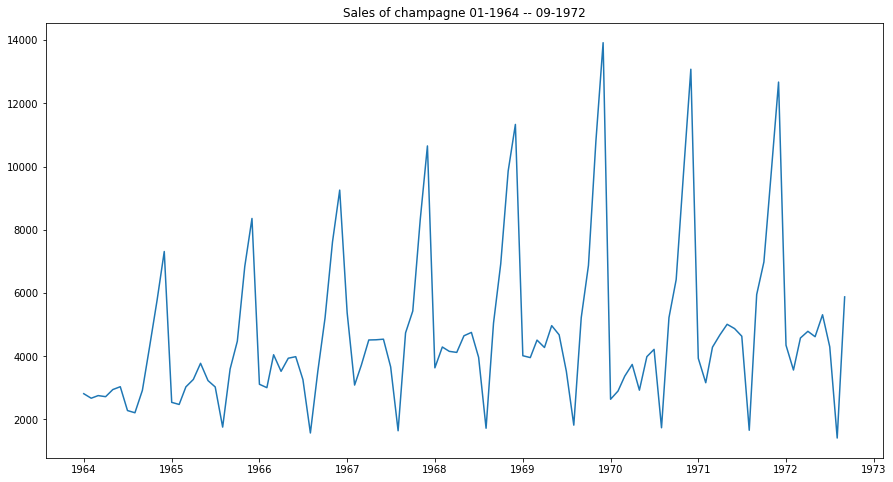

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(data)
plt.title('Sales of champagne 01-1964 -- 09-1972')
plt.show()

**Quan sát ban đầu cho thấy dữ liệu có xu hướng thay đổi theo mùa**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
result

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


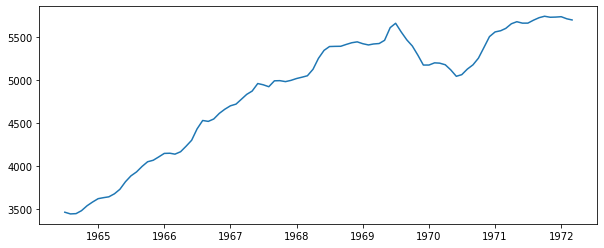

In [ ]:
# quan sat trend
plt.figure(figsize=(10,4))
plt.plot(result.trend)
plt.show()

**Dữ liệu có xu hướng tăng tuyến tính từ năm 1964 đến 1969, sau đó giảm dến giữa năm 1970 và tăng tuyến tính đến 1972**

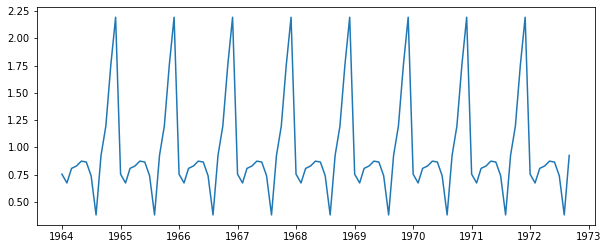

In [ ]:
# quan sat seasonal
plt.figure(figsize=(10,4))
plt.plot(result.seasonal)
plt.show()

**Dữ liệu biến đổi theo mùa rõ rệt, tăng nhẹ tầm giữa năm, giảm mạnh vào các tháng hè, tăng vọt vào cuối năm và sau đó giảm mạnh vào đầu năm sau**

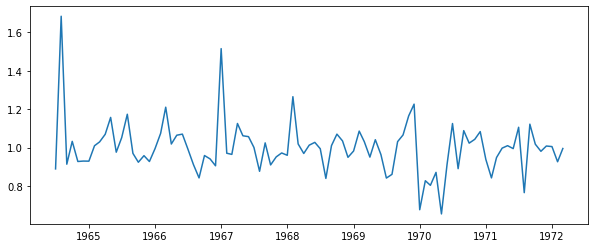

In [ ]:
# quan sat resid
plt.figure(figsize=(10,4))
plt.plot(result.resid)
plt.show()

**Số dư biến động trong khoảng từ 0.2 đến 2, có 1 số thời điểm biến động mạnh, tăng cao đột ngột và giảm sâu**

**Sử dụng thuật toán HoltWinters có sẵn của python để dự đoán**

In [ ]:
train, test = data.iloc[:78,0], data.iloc[78:,0]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
pred = model.predict(start=test.index[0], end=test.index[-1])

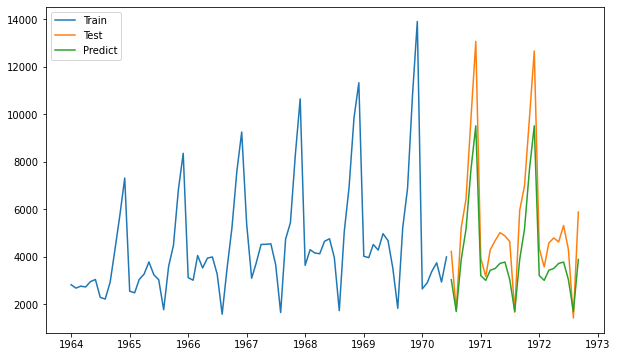

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Predict')
plt.legend(loc='best')

**Dự đoán đúng xu hướng tăng giảm, nhưng không thể dự đoán đúng đỉnh tăng**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mse = mean_squared_error(test,pred)
mse

2445498.353448822

In [ ]:
mae = mean_absolute_error(test,pred)
mae

1328.5457142031416

In [ ]:
# du doan 9 thang tiep theo
import datetime
s = datetime.datetime(1972,9,1)
e = datetime.datetime(1973,6,1)
pred_next_9_month = model.predict(start=s, end=e)
pred_next_9_month

1972-09-01    3880.570778
1972-10-01    5157.413505
1972-11-01    7683.475491
1972-12-01    9516.334245
1973-01-01    3201.489086
1973-02-01    2999.666530
1973-03-01    3425.377465
1973-04-01    3501.250326
1973-05-01    3713.753385
1973-06-01    3770.638863
Freq: MS, dtype: float64

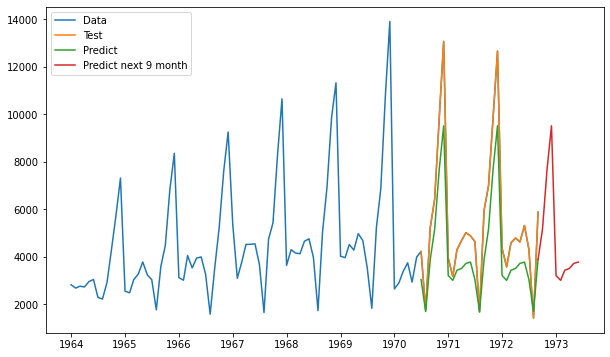

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data, label='Data')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Predict')
plt.plot(pred_next_9_month.index, pred_next_9_month, label='Predict next 9 month')
plt.legend(loc='best')

**Doanh số sẽ tăng dần từ tháng 10, đạt đỉnh vào tháng 12 và giảm nhanh, tăng nhẹ vào tháng 3 năm sau và có xu hướng tăng vào các tháng tiếp theo**